In [135]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import scipy.stats as st
import seaborn as sns
# pd.set_option('display.max_rows', None)

In [136]:
# Bring in CSV and Read in the File
file = Path("../Resources/clean_winemag_data.csv")
wine_df = pd.read_csv(file, index_col=0)
wine_df.head()

,Bottle Name,Type,Winery,Designation,Region,Province,Country,Price,Rating,Sommelier,Sommelier Twitter Handle,Description
1,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Avidagos,NaN,Douro,Portugal,15.0,87.0,Roger Voss,@vossroger,"This is ripe and fruity, a wine that is smooth..."
2,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,NaN,Willamette Valley,Oregon,US,14.0,87.0,Paul Gregutt,@paulgwine,"Tart and snappy, the flavors of lime flesh and..."
3,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,Reserve Late Harvest,Lake Michigan Shore,Michigan,US,13.0,87.0,Alexander Peartree,NaN,"Pineapple rind, lemon pith and orange blossom ..."
4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Vintner's Reserve Wild Child Block,Willamette Valley,Oregon,US,65.0,87.0,Paul Gregutt,@paulgwine,"Much like the regular bottling from 2012, this..."
5,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,Ars In Vitro,Navarra,Northern Spain,Spain,15.0,87.0,Michael Schachner,@wineschach,Blackberry and raspberry aromas show a typical...


In [137]:
# count of all the values in the df
wine_df.count()

Bottle Name                 120915
Type                        120915
Winery                      120915
Designation                  86148
Region                      101400
Province                    120915
Country                     120915
Price                       120915
Rating                      120915
Sommelier                    96420
Sommelier Twitter Handle     91500
Description                 120915
dtype: int64

In [138]:
#top ten wines with the most ratings/reviews

top_ten_reviewed_wines = list(wine_df["Type"].value_counts()[:10].index)
top_ten_reviewed_wines

['Pinot Noir',
 'Chardonnay',
 'Cabernet Sauvignon',
 'Red Blend',
 'Bordeaux-style Red Blend',
 'Riesling',
 'Sauvignon Blanc',
 'Syrah',
 'Rosé',
 'Merlot']

In [139]:
#top ten wines from each of the top ten wine types

top_reviewed_wines = wine_df[wine_df['Type'].isin(top_ten_reviewed_wines)]
top_reviewed_wines.head()
top_reviewed_wines.sort_values(['Type','Rating'],ascending=False).groupby('Type').head(10)

,Bottle Name,Type,Winery,Designation,Region,Province,Country,Price,Rating,Sommelier,Sommelier Twitter Handle,Description
113929,Charles Smith 2006 Royal City Syrah (Columbia ...,Syrah,Charles Smith,Royal City,Columbia Valley (WA),Washington,US,80.0,100.0,Paul Gregutt,@paulgwine,In 2005 Charles Smith introduced three high-en...
123545,Cayuse 2008 Bionic Frog Syrah (Walla Walla Val...,Syrah,Cayuse,Bionic Frog,Walla Walla Valley (WA),Washington,US,80.0,100.0,Paul Gregutt,@paulgwine,Initially a rather subdued Frog; as if it has ...
47428,Cayuse 2009 En Chamberlin Vineyard Syrah (Wall...,Syrah,Cayuse,En Chamberlin Vineyard,Walla Walla Valley (OR),Oregon,US,75.0,99.0,Paul Gregutt,@paulgwine,In a vintage that produced the finest overall ...
47894,Cayuse 2011 En Chamberlin Vineyard Syrah (Wall...,Syrah,Cayuse,En Chamberlin Vineyard,Walla Walla Valley (OR),Oregon,US,75.0,99.0,Paul Gregutt,@paulgwine,"Dark and concentrated, this sends up complex a..."
47895,Cayuse 2011 En Cerise Vineyard Syrah (Walla Wa...,Syrah,Cayuse,En Cerise Vineyard,Walla Walla Valley (OR),Oregon,US,75.0,98.0,Paul Gregutt,@paulgwine,The immediate impression is of savory umami ar...
...,...,...,...,...,...,...,...,...,...,...,...,...
116140,Alpha Omega 2012 ERA Red (Napa Valley),Bordeaux-style Red Blend,Alpha Omega,ERA,Napa Valley,California,US,300.0,99.0,Virginie Boone,@vboone,This blend from individual blocks includes 94%...
1558,Château Margaux 2009 Margaux,Bordeaux-style Red Blend,Château Margaux,NaN,Margaux,Bordeaux,France,1900.0,98.0,Roger Voss,@vossroger,"A massive wine for Margaux, packed with tannin..."
1559,Château Palmer 2009 Margaux,Bordeaux-style Red Blend,Château Palmer,NaN,Margaux,Bordeaux,France,380.0,98.0,Roger Voss,@vossroger,"A beautiful wine, with the firmest tannins sur..."
1560,Pirouette 2008 Red Wine Red (Columbia Valley (...,Bordeaux-style Red Blend,Pirouette,Red Wine,Columbia Valley (WA),Washington,US,50.0,98.0,Paul Gregutt,@paulgwine,"A stunning Pirouette—63% Cabernet Sauvignon, 2..."


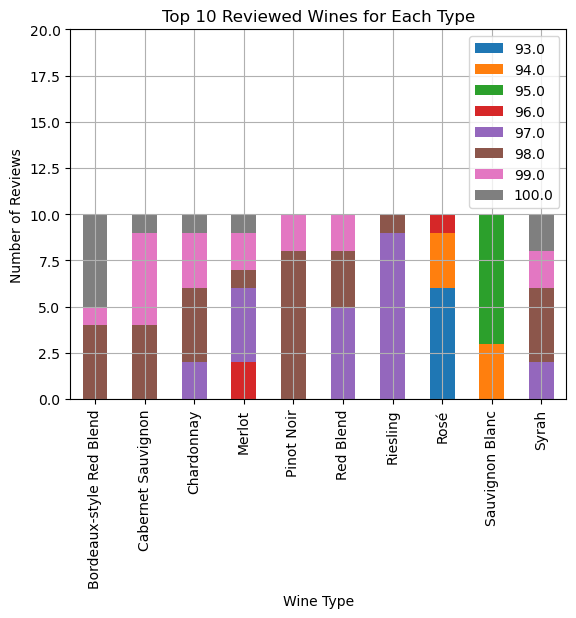

In [186]:
# Get the top 10 reviewed wines for each type
top_reviewed_wines = wine_df[wine_df['Type'].isin(top_ten_reviewed_wines)]
top_reviewed_wines = top_reviewed_wines.sort_values(['Type','Rating'], ascending=False).groupby('Type').head(10)

# Count the number of reviews for each wine
counts = top_reviewed_wines.groupby(['Type','Rating']).size().unstack()

# Plot a stacked bar chart
counts.plot(kind='bar', stacked=True, grid= True)

# Set the axis labels and title
plt.xlabel('Wine Type')
plt.ylabel('Number of Reviews')
plt.ylim(0, 20)
plt.title('Top 10 Reviewed Wines for Each Type')
plt.legend(loc = "best")

# Show the plot
plt.show()

In [141]:
#top ten wines

correlation, p_value = pearsonr(top_reviewed_wines["Price"], top_reviewed_wines["Rating"])

print(f"cor: {correlation} and p {p_value}")

cor: 0.344379417067758 and p 0.00045071242409226784


In [142]:
#Pinot Noir Top
pinot_noir_top = top_reviewed_wines[top_reviewed_wines["Type"] == "Pinot Noir"]
pinot_noir_top

,Bottle Name,Type,Winery,Designation,Region,Province,Country,Price,Rating,Sommelier,Sommelier Twitter Handle,Description
1557,Williams Selyem 2009 Precious Mountain Vineyar...,Pinot Noir,Williams Selyem,Precious Mountain Vineyard,Sonoma Coast,California,US,94.0,99.0,NaN,NaN,"A stupendous Pinot Noir, showing how beautiful..."
47429,Williams Selyem 2010 Hirsch Vineyard Pinot Noi...,Pinot Noir,Williams Selyem,Hirsch Vineyard,Sonoma Coast,California,US,75.0,99.0,NaN,NaN,This expresses the greatness of its vintage an...
4502,Wayfarer 2014 The Traveler Pinot Noir (Fort Ro...,Pinot Noir,Wayfarer,The Traveler,Fort Ross-Seaview,California,US,155.0,98.0,Virginie Boone,@vboone,"Structured, with years to go to take on added ..."
45784,Williams Selyem 2013 Coastlands Vineyard Pinot...,Pinot Noir,Williams Selyem,Coastlands Vineyard,Sonoma Coast,California,US,75.0,98.0,Virginie Boone,@vboone,There is something ethereal and beyond words a...
47430,Williams Selyem 2010 Precious Mountain Vineyar...,Pinot Noir,Williams Selyem,Precious Mountain Vineyard,Sonoma Coast,California,US,94.0,98.0,NaN,NaN,"In recent years, Precious Mountain Vineyard ha..."
48896,Louis Jadot 2005 Charmes-Chambertin,Pinot Noir,Louis Jadot,NaN,Charmes-Chambertin,Burgundy,France,134.0,98.0,Roger Voss,@vossroger,"A complete wine. As it starts in the mouth, th..."
48897,Clos de Tart 2005 Clos de Tart,Pinot Noir,Clos de Tart,NaN,Clos de Tart,Burgundy,France,319.0,98.0,Roger Voss,@vossroger,"A beautiful wine, smooth, polished, with round..."
48898,Louis Jadot 2005 Clos de la Roche,Pinot Noir,Louis Jadot,NaN,Clos de la Roche,Burgundy,France,138.0,98.0,Roger Voss,@vossroger,This is a powerhouse of a wine. It is driven f...
109332,Williams Selyem 2013 Westside Road Neighbors P...,Pinot Noir,Williams Selyem,Westside Road Neighbors,Russian River Valley,California,US,69.0,98.0,Virginie Boone,@vboone,"Seductively smooth and intriguingly aromatic, ..."
122938,Williams Selyem 2014 Coastlands Vineyard Pinot...,Pinot Noir,Williams Selyem,Coastlands Vineyard,Sonoma Coast,California,US,75.0,98.0,Virginie Boone,@vboone,"Pretty as all get-out, this wine is a floral m..."


In [200]:
# plt.scatter(pinot_noir_top["Price"] , pinot_noir_top["Rating"])
# plt.title("Pinot Noir")
# plt.xlabel("Price of Top 10 Pinot Noirs")
# plt.ylabel("Rating")

In [144]:
#Pinot Noir Correlation

pinot_noir_corr, pinot_noir_p = pearsonr(pinot_noir_top['Price'], pinot_noir_top['Rating'])
pinot_noir_corr , pinot_noir_p

# print(f"Pearson correlation coefficient: {corr:.2f}, p-value: {pval:.2f}")

(-0.26737987828888937, 0.45515858094381195)

In [145]:
#Chardonnay Top
chardonnay_top = top_reviewed_wines[top_reviewed_wines["Type"] == "Chardonnay"]
chardonnay_top

,Bottle Name,Type,Winery,Designation,Region,Province,Country,Price,Rating,Sommelier,Sommelier Twitter Handle,Description
89729,Salon 2006 Le Mesnil Blanc de Blancs Brut Char...,Chardonnay,Salon,Le Mesnil Blanc de Blancs Brut,Champagne,Champagne,France,617.0,100.0,Roger Voss,@vossroger,This new release from a great vintage for Char...
36529,Krug 2002 Clos du Mesnil Brut Blanc de Blancs ...,Chardonnay,Krug,Clos du Mesnil Brut Blanc de Blancs,Champagne,Champagne,France,800.0,99.0,Roger Voss,@vossroger,Pure Chardonnay from the walled vineyard in th...
98375,Domaine Leflaive 2010 Bâtard-Montrachet,Chardonnay,Domaine Leflaive,NaN,Bâtard-Montrachet,Burgundy,France,560.0,99.0,Roger Voss,@vossroger,"In this great year for white Burgundy, Bâtard-..."
118059,Failla 2010 Estate Vineyard Chardonnay (Sonoma...,Chardonnay,Failla,Estate Vineyard,Sonoma Coast,California,US,44.0,99.0,NaN,NaN,"Shows classic, full-throttle notes of tropical..."
27591,Louis Jadot 2014 Bâtard-Montrachet,Chardonnay,Louis Jadot,NaN,Bâtard-Montrachet,Burgundy,France,367.0,98.0,Roger Voss,@vossroger,This is a major wine from a great white wine v...
36530,Salon 2004 Le Mesnil Blanc de Blancs Brut Char...,Chardonnay,Salon,Le Mesnil Blanc de Blancs Brut,Champagne,Champagne,France,520.0,98.0,Roger Voss,@vossroger,Salon's releases are rare and signify a great ...
56954,Wayfarer 2014 Wayfarer Vineyard Chardonnay (Fo...,Chardonnay,Wayfarer,Wayfarer Vineyard,Fort Ross-Seaview,California,US,80.0,98.0,Virginie Boone,@vboone,This is yet another stunning wine from this si...
82751,Bouchard Père & Fils 2007 Montrachet,Chardonnay,Bouchard Père & Fils,NaN,Montrachet,Burgundy,France,757.0,98.0,Roger Voss,@vossroger,From arguably the finest white wine vineyard i...
5910,Domaine Leflaive 2008 Bâtard-Montrachet,Chardonnay,Domaine Leflaive,NaN,Bâtard-Montrachet,Burgundy,France,430.0,97.0,Roger Voss,@vossroger,This beautiful wine is austere at this very yo...
5911,Domaine Leflaive 2008 Chevalier-Montrachet,Chardonnay,Domaine Leflaive,NaN,Chevalier-Montrachet,Burgundy,France,550.0,97.0,Roger Voss,@vossroger,"A ripe, toasty wine, very buttery. It has rich..."


In [199]:
# #Chardonnay Scatter

# plt.scatter(chardonnay_top["Price"], chardonnay_top["Rating"])
# plt.title("Chardonnay")
# plt.xlabel("Price of Top 10 Chardonnays")
# plt.ylabel("Rating")

In [147]:
#Chardonnay Correlation
chardonnay_corr, chardonnay_p = pearsonr(chardonnay_top["Price"] , chardonnay_top["Rating"])
chardonnay_corr , chardonnay_p

(0.11138122498629156, 0.75935376134453)

In [148]:
#Cabernet Sauvignon Top
cabernet_sauvignon_top = top_reviewed_wines[top_reviewed_wines["Type"] == "Cabernet Sauvignon"]
cabernet_sauvignon_top

,Bottle Name,Type,Winery,Designation,Region,Province,Country,Price,Rating,Sommelier,Sommelier Twitter Handle,Description
45798,Cardinale 2006 Cabernet Sauvignon (Napa Valley),Cabernet Sauvignon,Cardinale,NaN,Napa Valley,California,US,200.0,100.0,NaN,NaN,Tasted in a flight of great and famous Napa wi...
1556,Quilceda Creek 2008 Cabernet Sauvignon (Columb...,Cabernet Sauvignon,Quilceda Creek,NaN,Columbia Valley (WA),Washington,US,125.0,99.0,Paul Gregutt,@paulgwine,The flagship wine from Quilceda Creek offers e...
107901,Venge 2008 Family Reserve Cabernet Sauvignon (...,Cabernet Sauvignon,Venge,Family Reserve,Oakville,California,US,125.0,99.0,NaN,NaN,"An absolute joy and triumph. Just superb, show..."
116141,Alpha Omega 2012 Stagecoach Vineyard Cabernet ...,Cabernet Sauvignon,Alpha Omega,Stagecoach Vineyard,Atlas Peak,California,US,250.0,99.0,Virginie Boone,@vboone,"Juicy and seductively smooth, this blockbuster..."
121885,David Arthur 2009 Elevation 1147 Estate Cabern...,Cabernet Sauvignon,David Arthur,Elevation 1147 Estate,Napa Valley,California,US,150.0,99.0,NaN,NaN,There are incredible aromatics on this Caberne...
128265,Trefethen 2005 Reserve Cabernet Sauvignon (Oak...,Cabernet Sauvignon,Trefethen,Reserve,Oak Knoll District,California,US,100.0,99.0,NaN,NaN,"This is nearly perfect, a massive, monumental ..."
27592,Shafer 2012 Hillside Select Cabernet Sauvignon...,Cabernet Sauvignon,Shafer,Hillside Select,Stags Leap District,California,US,265.0,98.0,Virginie Boone,@vboone,"The highly sought-after, perennially beautiful..."
38978,Yao Ming 2010 Family Reserve Cabernet Sauvigno...,Cabernet Sauvignon,Yao Ming,Family Reserve,Napa Valley,California,US,625.0,98.0,NaN,NaN,We can debate the pricing on Yao Ming's new re...
39289,Vine Cliff 2007 Cabernet Sauvignon (Oakville),Cabernet Sauvignon,Vine Cliff,NaN,Oakville,California,US,75.0,98.0,NaN,NaN,Pretty much as good as Napa Cabernet gets. Sho...
41837,Araujo 2007 Eisele Cabernet Sauvignon (Napa Va...,Cabernet Sauvignon,Araujo,Eisele,Napa Valley,California,US,275.0,98.0,NaN,NaN,"Profoundly beautiful aroma on this Cab, a perf..."


In [190]:
#Cabernet Sauvignon Scatter

# plt.scatter(cabernet_sauvignon_top["Price"] , cabernet_sauvignon_top["Rating"])
# plt.title("Cabernet Sauvignon")
# plt.xlabel("Price of Top 10 Cabernet Sauvignon")
# plt.ylabel("Rating")

In [150]:
cabernet_sauv_corr, cabernet_sauv_p = pearsonr(cabernet_sauvignon_top["Price"] , cabernet_sauvignon_top["Rating"])
cabernet_sauv_corr , cabernet_sauv_p

(-0.39549025536879007, 0.25795669946888633)

In [151]:
#Red Blend Top

red_blend_top = top_reviewed_wines[top_reviewed_wines["Type"] == "Red Blend"]
red_blend_top

,Bottle Name,Type,Winery,Designation,Region,Province,Country,Price,Rating,Sommelier,Sommelier Twitter Handle,Description
35517,Tenuta San Guido 2012 Sassicaia (Bolgheri Sas...,Red Blend,Tenuta San Guido,Sassicaia,Bolgheri Sassicaia,Tuscany,Italy,235.0,99.0,Kerin O’Keefe,@kerinokeefe,"One of Italy's most iconic bottlings, the 2012..."
121884,Colgin 2008 IX Estate Red (Napa Valley),Red Blend,Colgin,IX Estate,Napa Valley,California,US,290.0,99.0,NaN,NaN,This is an absolutely beautiful wine to drink ...
1561,Marchesi Antinori 2008 Guado al Tasso (Bolghe...,Red Blend,Marchesi Antinori,Guado al Tasso,Bolgheri Superiore,Tuscany,Italy,102.0,98.0,NaN,NaN,"Here's a “wow” wine on every level, with incre..."
26889,Tenuta San Guido 2013 Bolgheri Sassicaia,Red Blend,Tenuta San Guido,NaN,Bolgheri Sassicaia,Tuscany,Italy,235.0,98.0,Kerin O’Keefe,@kerinokeefe,"Red berry, cedar and light spice aromas lead t..."
79105,Tenuta dell'Ornellaia 2004 Ornellaia (Bolgher...,Red Blend,Tenuta dell'Ornellaia,Ornellaia,Bolgheri Superiore,Tuscany,Italy,175.0,98.0,NaN,NaN,This is a hopelessly gorgeous wine with so muc...
1563,Tenuta San Guido 2008 Sassicaia (Bolgheri Sas...,Red Blend,Tenuta San Guido,Sassicaia,Bolgheri Sassicaia,Tuscany,Italy,220.0,97.0,NaN,NaN,Recently implemented winemaker and cellar chan...
1564,Tenuta dell'Ornellaia 2008 Ornellaia (Bolgher...,Red Blend,Tenuta dell'Ornellaia,Ornellaia,Bolgheri Superiore,Tuscany,Italy,215.0,97.0,NaN,NaN,The 2008 Ornellaia delivers concentrated aroma...
21078,Marchesi Antinori 2010 Solaia Red (Toscana),Red Blend,Marchesi Antinori,Solaia,Toscana,Tuscany,Italy,325.0,97.0,Kerin O’Keefe,@kerinokeefe,"Already one of Italy's most iconic bottlings, ..."
35519,Marchesi Antinori 2012 Solaia Red (Toscana),Red Blend,Marchesi Antinori,Solaia,Toscana,Tuscany,Italy,325.0,97.0,Kerin O’Keefe,@kerinokeefe,This stunning expression of Solaia opens with ...
45801,Tenuta dell'Ornellaia 2006 Ornellaia (Bolgher...,Red Blend,Tenuta dell'Ornellaia,Ornellaia,Bolgheri Superiore,Tuscany,Italy,200.0,97.0,NaN,NaN,"Consistently among Italy's top-scoring wines, ..."


In [191]:
# plt.scatter(red_blend_top["Price"] , red_blend_top["Rating"])
# plt.title("Red Blend")
# plt.xlabel("Price of Top 10 Red Blends")
# plt.ylabel("Rating")

In [153]:
red_blend_corr, red_blend_p = pearsonr(red_blend_top["Price"] , red_blend_top["Rating"])
red_blend_corr, red_blend_p

(-0.12483262175718095, 0.7311443217576287)

In [154]:
#Bordeaux-style Red Blend Top

bordeaux_rb_top = top_reviewed_wines[top_reviewed_wines["Type"] == "Bordeaux-style Red Blend"]
bordeaux_rb_top

,Bottle Name,Type,Winery,Designation,Region,Province,Country,Price,Rating,Sommelier,Sommelier Twitter Handle,Description
58352,Château Léoville Barton 2010 Saint-Julien,Bordeaux-style Red Blend,Château Léoville Barton,NaN,Saint-Julien,Bordeaux,France,150.0,100.0,Roger Voss,@vossroger,"This is a magnificently solid wine, initially ..."
111753,Château Lafite Rothschild 2010 Pauillac,Bordeaux-style Red Blend,Château Lafite Rothschild,NaN,Pauillac,Bordeaux,France,1500.0,100.0,Roger Voss,@vossroger,"Almost black in color, this stunning wine is g..."
111755,Château Cheval Blanc 2010 Saint-Émilion,Bordeaux-style Red Blend,Château Cheval Blanc,NaN,Saint-Émilion,Bordeaux,France,1500.0,100.0,Roger Voss,@vossroger,This is the finest Cheval Blanc for many years...
111756,Château Léoville Las Cases 2010 Saint-Julien,Bordeaux-style Red Blend,Château Léoville Las Cases,NaN,Saint-Julien,Bordeaux,France,359.0,100.0,Roger Voss,@vossroger,"A hugely powerful wine, full of dark, brooding..."
118058,Verité 2007 La Muse Red (Sonoma County),Bordeaux-style Red Blend,Verité,La Muse,Sonoma County,California,US,450.0,100.0,NaN,NaN,This wine dazzles with perfection. Sourced fro...
116140,Alpha Omega 2012 ERA Red (Napa Valley),Bordeaux-style Red Blend,Alpha Omega,ERA,Napa Valley,California,US,300.0,99.0,Virginie Boone,@vboone,This blend from individual blocks includes 94%...
1558,Château Margaux 2009 Margaux,Bordeaux-style Red Blend,Château Margaux,NaN,Margaux,Bordeaux,France,1900.0,98.0,Roger Voss,@vossroger,"A massive wine for Margaux, packed with tannin..."
1559,Château Palmer 2009 Margaux,Bordeaux-style Red Blend,Château Palmer,NaN,Margaux,Bordeaux,France,380.0,98.0,Roger Voss,@vossroger,"A beautiful wine, with the firmest tannins sur..."
1560,Pirouette 2008 Red Wine Red (Columbia Valley (...,Bordeaux-style Red Blend,Pirouette,Red Wine,Columbia Valley (WA),Washington,US,50.0,98.0,Paul Gregutt,@paulgwine,"A stunning Pirouette—63% Cabernet Sauvignon, 2..."
30109,Joseph Phelps 2013 Insignia 40th Vintage Estat...,Bordeaux-style Red Blend,Joseph Phelps,Insignia 40th Vintage Estate Grown,Napa Valley,California,US,250.0,98.0,Virginie Boone,@vboone,The mighty Insignia shows a vibrancy of purpos...


In [192]:
# plt.scatter(bordeaux_rb_top["Price"], bordeaux_rb_top["Rating"])
# plt.title("Bordeaux-style Red Blend Top")
# plt.xlabel("Price of Top 10 Bordeaux-style Red Blends")
# plt.ylabel("Rating")

In [156]:
bordeaux_rb_corr, bordeaux_rb_p = pearsonr(bordeaux_rb_top["Price"] , bordeaux_rb_top["Rating"])
bordeaux_rb_corr , bordeaux_rb_p

(0.11526524549126349, 0.7511806426562961)

In [157]:
#Riesling Top

riesling_top = top_reviewed_wines[top_reviewed_wines["Type"] == "Riesling"]
riesling_top

,Bottle Name,Type,Winery,Designation,Region,Province,Country,Price,Rating,Sommelier,Sommelier Twitter Handle,Description
16522,Robert Weil 2015 Kiedrich Gräfenberg Trockenbe...,Riesling,Robert Weil,Kiedrich Gräfenberg Trockenbeerenauslese,NaN,Rheingau,Germany,775.0,98.0,Anna Lee C. Iijima,NaN,"With layers upon layers of spicy saffron, peac..."
347,Robert Weil 2014 Kiedrich Gräfenberg Trockenbe...,Riesling,Robert Weil,Kiedrich Gräfenberg Trockenbeerenauslese,NaN,Rheingau,Germany,775.0,97.0,Anna Lee C. Iijima,NaN,"Dusty, saffron-spiced earthiness is juxtaposed..."
67097,Schloss Johannisberger 2006 Trockenbeerenausle...,Riesling,Schloss Johannisberger,Trockenbeerenauslese Goldlack,NaN,Rheingau,Germany,486.0,97.0,Joe Czerwinski,@JoeCz,So incredibly thick and sweet it's almost chew...
89730,René Muré 2015 Clos Saint Landelin Vorbourg Gr...,Riesling,René Muré,Clos Saint Landelin Vorbourg Grand Cru,Alsace,Alsace,France,50.0,97.0,Anne Krebiehl MW,@AnneInVino,The heady aromatic scent of fresh tangerine pe...
89731,Domaine Ostertag 2015 Muenchberg Grand Cru Rie...,Riesling,Domaine Ostertag,Muenchberg Grand Cru,Alsace,Alsace,France,66.0,97.0,Anne Krebiehl MW,@AnneInVino,There is something incredibly fruity and simul...
89732,Domaine Zind-Humbrecht 2015 Clos Saint Urbain ...,Riesling,Domaine Zind-Humbrecht,Clos Saint Urbain Rangen de Thann Grand Cru,Alsace,Alsace,France,120.0,97.0,Anne Krebiehl MW,@AnneInVino,"Smoke, orange, wet stone and earth notes are p..."
89733,Trimbach 2014 Schlossberg Grand Cru Riesling (...,Riesling,Trimbach,Schlossberg Grand Cru,Alsace,Alsace,France,100.0,97.0,Anne Krebiehl MW,@AnneInVino,An earthy touch of freshly turned soil clings ...
102484,S.A. Prüm 2006 Wehlener Sonnenuhr Trockenbeere...,Riesling,S.A. Prüm,Wehlener Sonnenuhr Trockenbeerenauslese Erste ...,NaN,Mosel,Germany,440.0,97.0,Anna Lee C. Iijima,NaN,Lip-smacking is an inelegant yet apt word to d...
117028,Schloss Johannisberger 2009 Trockenbeerenausle...,Riesling,Schloss Johannisberger,Trockenbeerenauslese,NaN,Rheingau,Germany,445.0,97.0,Joe Czerwinski,@JoeCz,"Even in a flight of top BAs and TBAs, this one..."
117029,Robert Weil 2009 Kiedrich Gräfenberg Trockenbe...,Riesling,Robert Weil,Kiedrich Gräfenberg Trockenbeerenauslese,NaN,Rheingau,Germany,612.0,97.0,Joe Czerwinski,@JoeCz,Hugely sweet yet reasonably balanced given its...


In [193]:
# plt.scatter(riesling_top["Price"], riesling_top["Rating"])
# plt.title("Riesling")
# plt.xlabel("Price of Top 10 Rieslings")
# plt.ylabel("Rating")

In [159]:
riesling_corr, riesling_p = pearsonr(riesling_top["Price"], riesling_top["Rating"])
riesling_corr, riesling_p

(0.47621983215772046, 0.16410748596755115)

In [160]:
#Sauvignon Blanc

sauvignon_blanc_top = top_reviewed_wines[top_reviewed_wines["Type"] == "Sauvignon Blanc"]
sauvignon_blanc_top

,Bottle Name,Type,Winery,Designation,Region,Province,Country,Price,Rating,Sommelier,Sommelier Twitter Handle,Description
30114,Pascal Jolivet 2014 Sauvage (Sancerre),Sauvignon Blanc,Pascal Jolivet,Sauvage,Sancerre,Loire Valley,France,73.0,95.0,Roger Voss,@vossroger,The match for the red wine under the same name...
38991,Grgich Hills 2012 Essence Estate Grown Sauvign...,Sauvignon Blanc,Grgich Hills,Essence Estate Grown,Napa Valley,California,US,50.0,95.0,NaN,NaN,The “Essence” in the designation refers to the...
38993,Henri Bourgeois 2011 Sancerre Jadis (Sancerre),Sauvignon Blanc,Henri Bourgeois,Sancerre Jadis,Sancerre,Loire Valley,France,50.0,95.0,Roger Voss,@vossroger,"The wine abounds with intensity, richness and ..."
44593,Domaine Vacheron 2014 Les Romains (Sancerre),Sauvignon Blanc,Domaine Vacheron,Les Romains,Sancerre,Loire Valley,France,65.0,95.0,Roger Voss,@vossroger,Named in honor of the Romans who first planted...
55726,Chalk Hill 2008 Musque Sauvignon Blanc (Chalk ...,Sauvignon Blanc,Chalk Hill,Musque,Chalk Hill,California,US,40.0,95.0,NaN,NaN,"Expensive, but brilliant. At the forefront of ..."
94445,Henri Bourgeois 2012 Jadis (Sancerre),Sauvignon Blanc,Henri Bourgeois,Jadis,Sancerre,Loire Valley,France,55.0,95.0,Roger Voss,@vossroger,"From selected, sunny parcels of vines, it's po..."
124432,Illumination 2008 Sauvignon Blanc (Napa Valley),Sauvignon Blanc,Illumination,NaN,Napa Valley,California,US,40.0,95.0,NaN,NaN,This is a blend of 92% Sauvignon Blanc and 8% ...
4632,Domaine Laporte 2016 Le Rochoy (Sancerre),Sauvignon Blanc,Domaine Laporte,Le Rochoy,Sancerre,Loire Valley,France,30.0,94.0,Roger Voss,@vossroger,"From a sloping flinty vineyard, this is an imp..."
4635,Henri Bourgeois 2014 Etienne Henri (Sancerre),Sauvignon Blanc,Henri Bourgeois,Etienne Henri,Sancerre,Loire Valley,France,65.0,94.0,Roger Voss,@vossroger,Named after an ancestor who pioneered using oa...
4644,Daniel Chotard 2015 Les Cris (Sancerre),Sauvignon Blanc,Daniel Chotard,Les Cris,Sancerre,Loire Valley,France,39.0,94.0,Roger Voss,@vossroger,This is a limited production wine from small p...


In [194]:
# plt.scatter(sauvignon_blanc_top["Price"] , sauvignon_blanc_top["Rating"])
# plt.title("Sauvignon Blanc")
# plt.xlabel("Price of Top 10 Sauvignon Blancs")
# plt.ylabel("Rating")

In [162]:
sauvignon_blanc_corr, sauvignon_blanc_p = pearsonr(sauvignon_blanc_top["Price"], sauvignon_blanc_top["Rating"])

sauvignon_blanc_corr, sauvignon_blanc_p

(0.3011563879330559, 0.39778741841104187)

In [163]:
#Syrah Top

syrah_top = top_reviewed_wines[top_reviewed_wines["Type"] == "Syrah"]
syrah_top


,Bottle Name,Type,Winery,Designation,Region,Province,Country,Price,Rating,Sommelier,Sommelier Twitter Handle,Description
113929,Charles Smith 2006 Royal City Syrah (Columbia ...,Syrah,Charles Smith,Royal City,Columbia Valley (WA),Washington,US,80.0,100.0,Paul Gregutt,@paulgwine,In 2005 Charles Smith introduced three high-en...
123545,Cayuse 2008 Bionic Frog Syrah (Walla Walla Val...,Syrah,Cayuse,Bionic Frog,Walla Walla Valley (WA),Washington,US,80.0,100.0,Paul Gregutt,@paulgwine,Initially a rather subdued Frog; as if it has ...
47428,Cayuse 2009 En Chamberlin Vineyard Syrah (Wall...,Syrah,Cayuse,En Chamberlin Vineyard,Walla Walla Valley (OR),Oregon,US,75.0,99.0,Paul Gregutt,@paulgwine,In a vintage that produced the finest overall ...
47894,Cayuse 2011 En Chamberlin Vineyard Syrah (Wall...,Syrah,Cayuse,En Chamberlin Vineyard,Walla Walla Valley (OR),Oregon,US,75.0,99.0,Paul Gregutt,@paulgwine,"Dark and concentrated, this sends up complex a..."
47895,Cayuse 2011 En Cerise Vineyard Syrah (Walla Wa...,Syrah,Cayuse,En Cerise Vineyard,Walla Walla Valley (OR),Oregon,US,75.0,98.0,Paul Gregutt,@paulgwine,The immediate impression is of savory umami ar...
83354,Cayuse 2008 En Cerise Vineyard Syrah (Walla Wa...,Syrah,Cayuse,En Cerise Vineyard,Walla Walla Valley (WA),Washington,US,70.0,98.0,Paul Gregutt,@paulgwine,"A subtle, complex, utterly distinctive mix of ..."
83462,Charles Smith 2008 Royal City Syrah (Columbia ...,Syrah,Charles Smith,Royal City,Columbia Valley (WA),Washington,US,140.0,98.0,Paul Gregutt,@paulgwine,An Amaro-like mix of bitters and herbs; this i...
117140,Gramercy 2010 Lagniappe Syrah (Columbia Valley...,Syrah,Gramercy,Lagniappe,Columbia Valley (WA),Washington,US,55.0,98.0,Paul Gregutt,@paulgwine,"Sourced from Red Willow, Olsen and Les Colline..."
41840,Donelan 2008 Richards Family Vineyard Syrah (S...,Syrah,Donelan,Richards Family Vineyard,Sonoma Valley,California,US,90.0,97.0,NaN,NaN,This is not only one of the best Syrahs of the...
47431,Cayuse 2009 Armada Vineyard Syrah (Walla Walla...,Syrah,Cayuse,Armada Vineyard,Walla Walla Valley (OR),Oregon,US,85.0,97.0,Paul Gregutt,@paulgwine,"Dense and concentrated, this has thick, almost..."


In [195]:
# plt.scatter(syrah_top["Price"], syrah_top["Rating"], alpha= 0.25)
# plt.title("Syrah")
# plt.xlabel("Price of Top 10 Syrahs")
# plt.ylabel("Rating")

In [165]:
syrah_corr, syrah_p = pearsonr(syrah_top["Price"], syrah_top["Rating"])
syrah_corr , syrah_p

(-0.16246591474520738, 0.6538388734151384)

In [166]:
#Rosé Top
rosé_top = top_reviewed_wines[top_reviewed_wines["Type"] == "Rosé"]
rosé_top


,Bottle Name,Type,Winery,Designation,Region,Province,Country,Price,Rating,Sommelier,Sommelier Twitter Handle,Description
26891,Schramsberg 2008 J. Schram Rosé (North Coast),Rosé,Schramsberg,J. Schram,North Coast,California,US,150.0,96.0,Jim Gordon,@gordone_cellars,"This is a beautiful, complex and complete wine..."
17981,Château d'Esclans 2015 Garrus Rosé (Côtes de P...,Rosé,Château d'Esclans,Garrus,Côtes de Provence,Provence,France,100.0,94.0,Roger Voss,@vossroger,This is a serious wine with a lighter brighter...
17983,Château Vignelaure 2016 Rosé (Coteaux d'Aix-en...,Rosé,Château Vignelaure,NaN,Coteaux d'Aix-en-Provence,Provence,France,20.0,94.0,Roger Voss,@vossroger,This is one of the classics among Provence ros...
84832,Limerick Lane 2015 Grenache Rosé (Russian Rive...,Rosé,Limerick Lane,Grenache,Russian River Valley,California,US,26.0,94.0,Virginie Boone,@vboone,This memorably beautiful and delicious wine is...
552,Château Vignelaure 2015 Rosé (Coteaux d'Aix-en...,Rosé,Château Vignelaure,NaN,Coteaux d'Aix-en-Provence,Provence,France,20.0,93.0,Roger Voss,@vossroger,Coming from a remote estate on the edge of the...
554,Mas de Cadenet 2015 Mas Negrel Cadenet Rosé (C...,Rosé,Mas de Cadenet,Mas Negrel Cadenet,Côtes de Provence Sainte-Victoire,Provence,France,40.0,93.0,Roger Voss,@vossroger,"Named after the Negrel family, owners of the e..."
9377,Château Grand Boise 2015 Cuvée Jadis Rosé (Côt...,Rosé,Château Grand Boise,Cuvée Jadis,Côtes de Provence,Provence,France,30.0,93.0,Roger Voss,@vossroger,"The top rosé from old vines at Grand Boise, th..."
9395,Château Coussin 2015 Cuvée César à Sumeire Ros...,Rosé,Château Coussin,Cuvée César à Sumeire,Côtes de Provence Sainte-Victoire,Provence,France,40.0,93.0,Roger Voss,@vossroger,The bottle carries the signature of French scu...
9396,Château d'Esclans 2014 Garrus Rosé (Côtes de P...,Rosé,Château d'Esclans,Garrus,Côtes de Provence,Provence,France,100.0,93.0,Roger Voss,@vossroger,"Always aged for a year before it is released, ..."
9399,Domaine Saint-André de Figuière 2015 Confident...,Rosé,Domaine Saint-André de Figuière,Confidentielle,Côtes de Provence La Londe,Provence,France,46.0,93.0,Roger Voss,@vossroger,A portion of this estate is in the cru appella...


In [196]:
# plt.scatter(rosé_top["Price"] , rosé_top["Rating"])
# plt.title("Rosé")
# plt.xlabel("Price of Top 10 Rosés")
# plt.ylabel("Rating")

In [168]:
rosé_corr, rosé_p = pearsonr(rosé_top["Price"] , rosé_top["Rating"])
rosé_corr , rosé_p

(0.6598515355688338, 0.03788464606826279)

In [169]:
#Merlot Top
merlot_top = top_reviewed_wines[top_reviewed_wines["Type"] == "Merlot"]
merlot_top

,Bottle Name,Type,Winery,Designation,Region,Province,Country,Price,Rating,Sommelier,Sommelier Twitter Handle,Description
39286,Tenuta dell'Ornellaia 2007 Masseto Merlot (Tos...,Merlot,Tenuta dell'Ornellaia,Masseto,Toscana,Tuscany,Italy,460.0,100.0,NaN,NaN,"A perfect wine from a classic vintage, the 200..."
39287,Le Macchiole 2007 Messorio Merlot (Toscana),Merlot,Le Macchiole,Messorio,Toscana,Tuscany,Italy,320.0,99.0,NaN,NaN,Here's a “wow” wine you won't easily forget. M...
79104,Tenuta dell'Ornellaia 2004 Masseto Merlot (Tos...,Merlot,Tenuta dell'Ornellaia,Masseto,Toscana,Tuscany,Italy,250.0,99.0,NaN,NaN,Even better than the highly acclaimed 2001 vin...
118061,Mt. Brave 2008 Merlot (Mount Veeder),Merlot,Mt. Brave,NaN,Mount Veeder,California,US,60.0,98.0,NaN,NaN,A tremendous achievement in Merlot. The vineya...
39291,Tenuta dell'Ornellaia 2006 Masseto Merlot (Tos...,Merlot,Tenuta dell'Ornellaia,Masseto,Toscana,Tuscany,Italy,460.0,97.0,NaN,NaN,This wine shows growing intensity the longer i...
79107,Fattoria Petrolo 2004 Galatrona Merlot (Toscana),Merlot,Fattoria Petrolo,Galatrona,Toscana,Tuscany,Italy,100.0,97.0,NaN,NaN,Galatrona is one of Italy's top Merlots and 20...
108646,Masseto 2010 Merlot (Toscana),Merlot,Masseto,NaN,Toscana,Tuscany,Italy,550.0,97.0,Kerin O’Keefe,@kerinokeefe,The phenomenal 2010 vintage shows why this win...
109409,Fattoria Petrolo 2008 Galatrona Merlot (Toscana),Merlot,Fattoria Petrolo,Galatrona,Toscana,Tuscany,Italy,134.0,97.0,NaN,NaN,"Each new vintage of Galatrona proves, year aft..."
39292,Castello di Ama 2006 L'Apparita Merlot (Toscana),Merlot,Castello di Ama,L'Apparita,Toscana,Tuscany,Italy,169.0,96.0,NaN,NaN,L'Apparita is a divine and delicate expression...
54307,Feudi di San Gregorio 2012 Patrimo Merlot (Cam...,Merlot,Feudi di San Gregorio,Patrimo,Campania,Southern Italy,Italy,105.0,96.0,Kerin O’Keefe,@kerinokeefe,This pure expression of Merlot opens with enti...


In [197]:
# plt.scatter(merlot_top["Price"] , merlot_top["Rating"])
# plt.title("Merlot")
# plt.xlabel("Price of Top 10 Merlot")
# plt.ylabel("Rating")

In [171]:
merlot_corr, merlot_p = pearsonr(merlot_top["Price"] , merlot_top["Rating"])
merlot_corr, merlot_p

(0.344918093977978, 0.3290285201142988)

In [172]:
#Creating a list of top wine types Price and Rating Correlations

list_of_wine_corr = [pinot_noir_corr, chardonnay_corr, cabernet_sauv_corr, red_blend_corr, bordeaux_rb_corr, riesling_corr, sauvignon_blanc_corr, syrah_corr, rosé_corr, merlot_corr ]
list_of_wine_corr

[-0.26737987828888937,
 0.11138122498629156,
 -0.39549025536879007,
 -0.12483262175718095,
 0.11526524549126349,
 0.47621983215772046,
 0.3011563879330559,
 -0.16246591474520738,
 0.6598515355688338,
 0.344918093977978]

In [173]:
top_ten_reviewed_wines

['Pinot Noir',
 'Chardonnay',
 'Cabernet Sauvignon',
 'Red Blend',
 'Bordeaux-style Red Blend',
 'Riesling',
 'Sauvignon Blanc',
 'Syrah',
 'Rosé',
 'Merlot']

In [174]:
#Turning Top 10 Wines into a DataFrame

wine_corr_df =  pd.DataFrame(top_ten_reviewed_wines , columns=["Top Ten Wine Types"])
wine_corr_df

,Top Ten Wine Types
0,Pinot Noir
1,Chardonnay
2,Cabernet Sauvignon
3,Red Blend
4,Bordeaux-style Red Blend
5,Riesling
6,Sauvignon Blanc
7,Syrah
8,Rosé
9,Merlot


In [185]:
#Adding Top Wine Correlations to DataFrame

wine_corr_df["Correlations Coefficients"] = list_of_wine_corr

wine_corr_df

,Top Ten Wine Types,Correlations Coefficients
0,Pinot Noir,-0.267380
1,Chardonnay,0.111381
2,Cabernet Sauvignon,-0.395490
3,Red Blend,-0.124833
4,Bordeaux-style Red Blend,0.115265
5,Riesling,0.476220
6,Sauvignon Blanc,0.301156
7,Syrah,-0.162466
8,Rosé,0.659852
9,Merlot,0.344918


In [184]:
top_reviewed_wines

,Bottle Name,Type,Winery,Designation,Region,Province,Country,Price,Rating,Sommelier,Sommelier Twitter Handle,Description
113929,Charles Smith 2006 Royal City Syrah (Columbia ...,Syrah,Charles Smith,Royal City,Columbia Valley (WA),Washington,US,80.0,100.0,Paul Gregutt,@paulgwine,In 2005 Charles Smith introduced three high-en...
123545,Cayuse 2008 Bionic Frog Syrah (Walla Walla Val...,Syrah,Cayuse,Bionic Frog,Walla Walla Valley (WA),Washington,US,80.0,100.0,Paul Gregutt,@paulgwine,Initially a rather subdued Frog; as if it has ...
47428,Cayuse 2009 En Chamberlin Vineyard Syrah (Wall...,Syrah,Cayuse,En Chamberlin Vineyard,Walla Walla Valley (OR),Oregon,US,75.0,99.0,Paul Gregutt,@paulgwine,In a vintage that produced the finest overall ...
47894,Cayuse 2011 En Chamberlin Vineyard Syrah (Wall...,Syrah,Cayuse,En Chamberlin Vineyard,Walla Walla Valley (OR),Oregon,US,75.0,99.0,Paul Gregutt,@paulgwine,"Dark and concentrated, this sends up complex a..."
47895,Cayuse 2011 En Cerise Vineyard Syrah (Walla Wa...,Syrah,Cayuse,En Cerise Vineyard,Walla Walla Valley (OR),Oregon,US,75.0,98.0,Paul Gregutt,@paulgwine,The immediate impression is of savory umami ar...
...,...,...,...,...,...,...,...,...,...,...,...,...
116140,Alpha Omega 2012 ERA Red (Napa Valley),Bordeaux-style Red Blend,Alpha Omega,ERA,Napa Valley,California,US,300.0,99.0,Virginie Boone,@vboone,This blend from individual blocks includes 94%...
1558,Château Margaux 2009 Margaux,Bordeaux-style Red Blend,Château Margaux,NaN,Margaux,Bordeaux,France,1900.0,98.0,Roger Voss,@vossroger,"A massive wine for Margaux, packed with tannin..."
1559,Château Palmer 2009 Margaux,Bordeaux-style Red Blend,Château Palmer,NaN,Margaux,Bordeaux,France,380.0,98.0,Roger Voss,@vossroger,"A beautiful wine, with the firmest tannins sur..."
1560,Pirouette 2008 Red Wine Red (Columbia Valley (...,Bordeaux-style Red Blend,Pirouette,Red Wine,Columbia Valley (WA),Washington,US,50.0,98.0,Paul Gregutt,@paulgwine,"A stunning Pirouette—63% Cabernet Sauvignon, 2..."


In [176]:
# # all of the wines from the same winery (charles smith)

# charles_smith_winerys = wine_df[wine_df["Winery"] == 'Charles Smith']
# charles_smith_winerys

In [177]:
# #wines that are from specific winery (Rainstorm)
# rainstorm_winerys = wine_df[wine_df["Winery"] == 'Rainstorm' ]
# rainstorm_winerys

In [178]:
# #top 10 wines from the province Oregon

# washington_winery = wine_df[wine_df["Province"] == "Oregon"]

# washington_winery